In [146]:
import numpy as np
import pandas as pd
import spotipy
import pickle
from pathlib import Path
from os import path
from spotipy.oauth2 import SpotifyClientCredentials
import librosa
import librosa.display
from sklearn.model_selection import train_test_split

## GTZAN
999 samples
<br>
one file is corrupt: "jazz.00054.wav"

In [143]:
def mel_spect(filepath):
    y, sr = librosa.load(filepath)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    #librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
    return mel_spect

X = []
labels = []
dir_name = 'genres_original/'
for path in Path(dir_name).rglob('*.wav'):
    try:
        x = mel_spect(path)
        x = x[:, :647]
        X.append(np.array([x]))
        labels.append(path.name.split('.')[0])
    except Exception as e:
        print(e)
        print(path)
        
"""
# One-hot encoding for the Y
Y = []
unique_labels = list(np.unique(labels))
for i, y in enumerate(labels):
    vector = np.zeros(len(unique_labels))
    vector[unique_labels.index(y)] = 1
    Y.append(vector)
"""

# Y to int label
Y = []
unique_labels = list(np.unique(labels))
for i, y in enumerate(labels):
    Y.append(unique_labels.index(y))


genres_original\jazz\jazz.00054.wav


In [136]:
print(np.unique(labels))

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [153]:
train = []
for i in range(len(X_train)):
    sample = (X_train[i], y_train[i])
    train.append(sample)
    
test = []
for i in range(len(X_test)):
    sample = (X_test[i], y_test[i])
    test.append(sample)

In [154]:
#pickle.dump(train, open('GTZAN.train', 'wb'))
#pickle.dump(test, open('GTZAN.test', 'wb'))

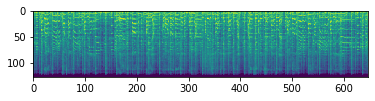

In [128]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.imshow(XY[0][0][0], interpolation='nearest')
plt.show()